# Analysis of R1 model data

A quick exploratory analysis of R1 model dataset obtained from Vistor. 
Dataset URL - TBA

In [1]:
%matplotlib inline
from matplotlib.pylab import *

import importlib.util
import sys
spec = importlib.util.spec_from_file_location("pdm", "/home/ubuntu/projects/S2B/GaiaChallenge/pdm.py")
pdm = importlib.util.module_from_spec(spec)
sys.modules["pdm"] = pdm
spec.loader.exec_module(pdm)

# Import Libraries
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats as st
from collections import namedtuple
import pandas as pd
from datetime import datetime

cmap = 'seismic'
density = {}

rcParams['figure.figsize'] = (10,6)
rcParams['font.size'] = 18

## Basic data loading/exploration

Loading a simulation snapshot using the DataLoad function.

In [3]:
fulldata = pdm.LoadData()

x = fulldata['x'].values
y = fulldata['y'].values
z = fulldata['z'].values
vx = fulldata['vx'].values
vy = fulldata['vy'].values
vz = fulldata['vz'].values

TypeError: LoadData() missing 1 required positional argument: 'filename_csv'

Note that the above assumes you have downloaded and unpacked the test data in the above folder.

In [16]:
fulldata

,x,y,z,vx,vy,vz
0,-1.185589,0.387044,0.281643,-97.199440,15.530616,-151.944020
1,0.400003,0.248072,-0.052701,-175.684660,223.813430,184.672410
2,-1.075962,-0.556421,-0.074970,135.597960,-137.675350,112.960140
3,0.286717,-0.415261,-0.315247,-187.211410,135.309400,140.030750
4,2.270559,-5.669712,0.150554,132.960450,-53.119793,-6.670953
...,...,...,...,...,...,...
7489264,1.020411,6.630146,-0.056567,-177.197140,58.544037,12.184828
7489265,-6.177278,-5.034438,-0.627045,98.728691,-62.081703,47.792080
7489266,5.812231,5.643428,-0.082499,-156.720230,19.514315,-34.014992
7489267,-5.958895,-5.522880,-0.025485,157.024120,-21.070320,-27.067957


In [17]:
len(fulldata)

7489269

## Accessing data

To access any of these arrays or vectors, you access them like a python list: 

In [18]:
print('x', x)
print('y', y)
print('z', z)
print()

print('vx', vx)
print('vy', vy)
print('vz', vz)
print()

x [-1.1855888   0.40000296 -1.0759624  ...  5.8122311  -5.9588952
  5.6456079 ]
y [ 0.3870438   0.24807201 -0.55642074 ...  5.6434278  -5.5228796
  5.5886564 ]
z [ 0.28164312 -0.05270057 -0.07496975 ... -0.08249884 -0.02548528
  0.08627713]

vx [ -97.19944 -175.68466  135.59796 ... -156.72023  157.02412 -162.69707]
vy [  15.530616  223.81343  -137.67535  ...   19.514315  -21.07032
   14.673622]
vz [-151.94402   184.67241   112.96014  ...  -34.014992  -27.067957
  -19.854509]



## Rendering binned stats images

Let us calculate the binned 2d stats for number density and plot face-on view.
We look at the entire data, limiting us by 15 kpc radius.

Rendering number density stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:01.404533



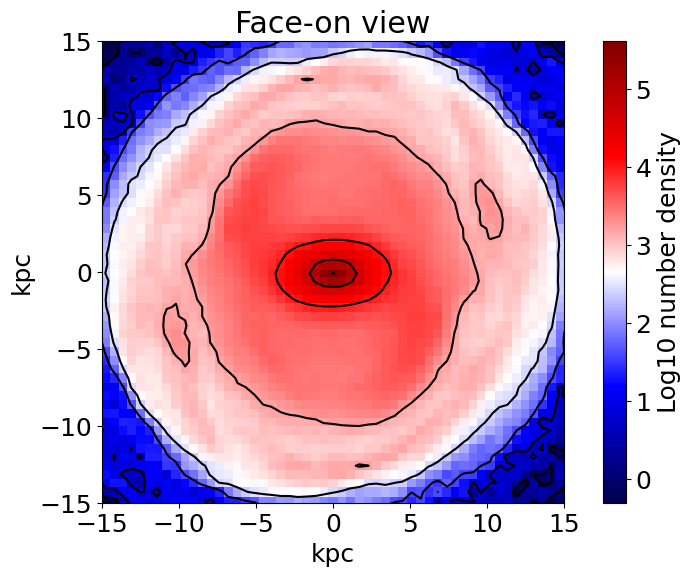

<Figure size 1000x600 with 0 Axes>

In [22]:
density_title = 'Face-on view'
density_cbar_label = 'Log10 number density'

xlim, ylim = 15, 15

pdm.RenderDensity(x,y,vz,xlim,ylim,density_title,density_cbar_label)

Let us rotate to 90 degree around X axis for edge-on view, calculate the binned 2d stats and plot.

Rendering number density stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:01.709929



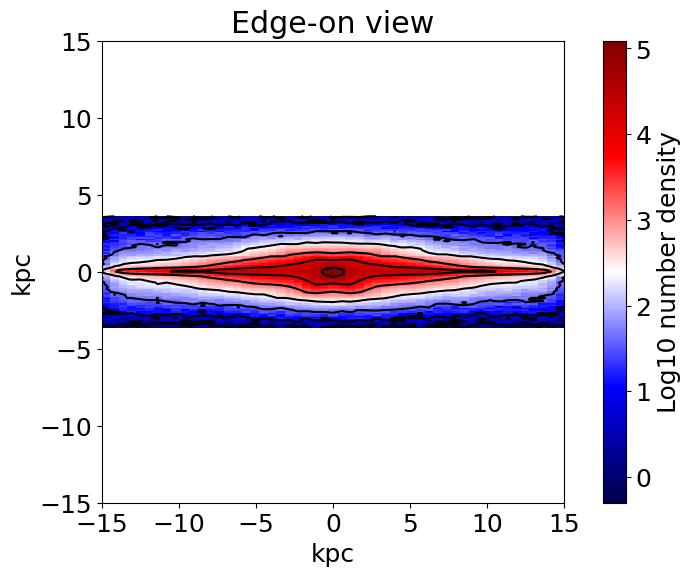

<Figure size 1000x600 with 0 Axes>

In [23]:
density_title = 'Edge-on view'
density_cbar_label = 'Log10 number density'

# Rotate to 90 around X axis for edge-on view
pos_data = pdm.mat_rotate_x(x, y, z, 90)
x = pos_data[:,0]
y = pos_data[:,1]
z = pos_data[:,2]

v_data = pdm.mat_rotate_x(vx, vy, vz, 90)
vx = v_data[:,0]
vy = v_data[:,1]
vz = v_data[:,2]

pdm.RenderDensity(x,y,vz,xlim,ylim,density_title,density_cbar_label)


Now we calculate binned 2d stats for moment 3 using edge-on orientation.
We soomn in on central area 3 x 16 kpc.

Rendering h3 moment stats...
Done!
Elapsed time (hh:mm:ss.ms) 0:00:12.205596



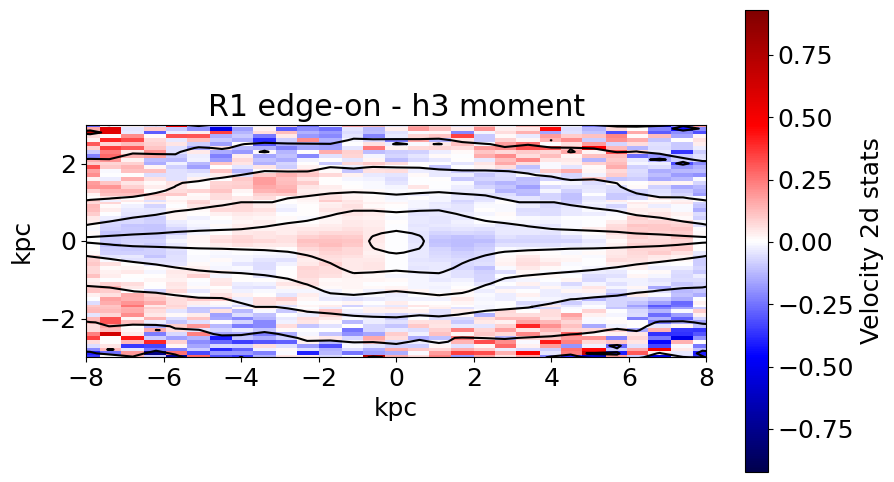

<Figure size 1000x600 with 0 Axes>

In [25]:
moment3_title = 'R1 edge-on - h3 moment'
moment3_cbar_label = 'Velocity 2d stats'

xlim, ylim = 8, 3

pdm.RenderMoment(3,x,y,vz,xlim,ylim,moment3_title,moment3_cbar_label)